<h1> MBA Analysis </h1>

<h5> Andreas Freund </h5>

<h7>acf2175</h7>

<h7>2/17/22</h7>

 

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm
from google.cloud import bigquery

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/andreasfreund/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

#setting max rows to print
pd.set_option('display.max_rows', 150)

# style
plt.style.use("fivethirtyeight")
%matplotlib inline

print('Executed')




Executed


<h3> Initial BigQuery SQL Speed Queries </h3>
<p>IPv4 with multiple concurrent TCP connections</p>

In [3]:
# ***DOWNLOAD***


peak_download_sql = """
SELECT 
    mt.Download as download_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(httpmt.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(5)] as low_5_pct_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(95)] as top_95_pct_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(20)] as low_20_pct_Mbps,
    MAX(httpmt.bytes_sec/125000) as max_Mbps, 
    MIN(httpmt.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(httpmt.bytes_sec/125000) as STD, 
    COUNT(DISTINCT httpmt.unit_id) as total_boxes 
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
WHERE (EXTRACT(HOUR FROM httpmt.dtime) >= 19) AND (EXTRACT(HOUR FROM httpmt.dtime) <=23) 
GROUP BY download_service_tier, ISP, tech
HAVING COUNT(DISTINCT httpmt.unit_id) > 9
ORDER BY download_service_tier, ISP, tech
"""
# ORDER BY STD DESC
#  APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(20)] as 20_percentile,
#  APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(4)] as low_4_percent_Mbps,


fullDay_download_sql = """
SELECT 
    mt.Download as download_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(httpmt.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(5)] as low_5_pct_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(95)] as top_95_pct_Mbps,
    APPROX_QUANTILES(httpmt.bytes_sec/125000, 100)[OFFSET(20)] as low_20_pct_Mbps,
    MAX(httpmt.bytes_sec/125000) as max_Mbps, 
    MIN(httpmt.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(httpmt.bytes_sec/125000) as STD,
    COUNT(DISTINCT httpmt.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
GROUP BY download_service_tier, ISP, tech
HAVING COUNT(DISTINCT httpmt.unit_id) > 9
ORDER BY download_service_tier, ISP
"""
# ORDER BY STD DESC



# ***UPLOAD***


peak_upload_sql = """
SELECT
    mt.Upload as upload_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(httppmt.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(5)] as low_5_pct_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(95)] as top_95_pct_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(20)] as low_20_pct_Mbps,
    MAX(httppmt.bytes_sec/125000) as max_Mbps, 
    MIN(httppmt.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(httppmt.bytes_sec/125000) as STD,
    COUNT(DISTINCT httppmt.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httppostmt` as httppmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httppmt.unit_id=mt.Unit_ID
WHERE (EXTRACT(HOUR FROM httppmt.dtime) >= 19) AND 
    (EXTRACT(HOUR FROM httppmt.dtime) <=23)
GROUP BY upload_service_tier, ISP, tech
HAVING COUNT(DISTINCT httppmt.unit_id) > 9
ORDER BY upload_service_tier, ISP
"""

fullDay_upload_sql = """
SELECT
    mt.Upload as upload_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(httppmt.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(5)] as low_5_pct_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(95)] as top_95_pct_Mbps,
    APPROX_QUANTILES(httppmt.bytes_sec/125000, 100)[OFFSET(20)] as low_20_pct_Mbps,
    MAX(httppmt.bytes_sec/125000) as max_Mbps, 
    MIN(httppmt.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(httppmt.bytes_sec/125000) as STD,
    COUNT(DISTINCT httppmt.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httppostmt` as httppmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httppmt.unit_id=mt.Unit_ID
GROUP BY upload_service_tier, ISP, tech
HAVING COUNT(DISTINCT httppmt.unit_id) > 9
ORDER BY upload_service_tier, ISP
"""
# ORDER BY STD DESC



# Creating main dataframes
peak_download = client.query(peak_download_sql).to_dataframe()
fullDay_download = client.query(fullDay_download_sql).to_dataframe()
peak_upload = client.query(peak_upload_sql).to_dataframe()
fullDay_upload = client.query(fullDay_upload_sql).to_dataframe()
print("Executed")


Executed


<h4>Peak-hour download data</h4>

In [27]:
peak_download 

,download_service_tier,ISP,tech,avg_Mbps,median_Mbps,low_5_pct_Mbps,top_95_pct_Mbps,low_20_pct_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,1.5,CenturyLink,DSL,1.210811,1.235744,0.669256,1.492840,1.064696,1.934584,0.022072,0.257870,65
1,3.0,CenturyLink,DSL,2.850792,2.832320,1.484872,4.766320,2.205512,5.404400,0.016840,0.897564,50
2,3.0,Comcast,Cable,3.511462,3.556472,3.279112,3.577728,3.540504,3.607728,0.262824,0.230169,10
3,3.0,Frontier,DSL,2.425750,2.632312,1.198840,3.585376,1.706096,3.998760,0.276048,0.724883,24
4,3.0,Verizon DSL,DSL,2.022737,2.307192,0.570384,2.804664,1.206728,2.846840,0.115192,0.724003,23
5,3.0,Windstream,DSL,2.598924,2.665840,0.547472,3.546224,2.091560,4.398760,0.020112,0.863872,15
6,4.0,Windstream,DSL,4.015566,4.367472,2.188920,4.414664,3.827016,4.609920,0.305016,0.728208,18
7,5.0,Cincinnati Bell,DSL,3.735885,4.216632,1.242880,4.329480,3.228968,41.034560,0.249400,1.448880,49
8,6.0,Frontier,DSL,5.444390,5.683616,1.770888,7.892512,4.402104,9.551024,0.443104,1.713407,36
9,6.0,Windstream,DSL,5.987729,5.984448,4.743992,6.866808,5.793120,6.946528,0.211760,0.729300,10


<h4>Full-day Download Data</h4>

In [28]:
fullDay_download

,download_service_tier,ISP,tech,avg_Mbps,median_Mbps,low_5_pct_Mbps,top_95_pct_Mbps,low_20_pct_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,1.5,CenturyLink,DSL,1.245270,1.249120,0.773144,1.523976,1.113936,1.964504,0.002232,0.245167,65
1,3.0,CenturyLink,DSL,2.995939,2.870304,1.836816,4.902648,2.375344,9.895568,0.005592,0.980693,50
2,3.0,Comcast,Cable,3.504590,3.557408,3.187368,3.579376,3.536304,3.683936,0.262824,0.201568,10
3,3.0,Frontier,DSL,2.541429,2.775128,1.217840,3.619992,1.769784,4.002112,0.274936,0.747847,24
4,3.0,Verizon DSL,DSL,2.195570,2.411232,0.864504,2.809232,1.442416,2.869192,0.005584,0.667580,23
5,3.0,Windstream,DSL,2.721502,2.787624,0.566216,4.077464,2.308312,4.675856,0.020112,0.816491,15
6,4.0,Windstream,DSL,4.093838,4.373088,2.500504,4.421832,3.961888,4.756280,0.305016,0.651890,18
7,5.0,Cincinnati Bell,DSL,3.710901,4.236448,1.275968,4.711608,2.968208,41.747272,0.110608,1.217759,49
8,6.0,Frontier,DSL,5.944643,5.826728,3.547376,8.658544,5.077472,9.565984,0.006696,1.439046,36
9,6.0,Windstream,DSL,5.975018,5.965184,4.942840,6.856776,5.781888,6.946528,0.211760,0.690536,10


<h4>Peak Upload Data</h4>

In [72]:
peak_upload

,upload_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,0.256,CenturyLink,DSL,0.192903,0.203536,0.099544,0.244552,0.471552,0.027848,0.058068,20
1,0.384,Frontier,DSL,0.507050,0.554656,0.149840,0.697880,0.737888,0.135312,0.183899,13
2,0.512,CenturyLink,DSL,0.268957,0.216960,0.115192,0.530584,0.778400,0.048608,0.145785,51
3,0.640,CenturyLink,DSL,0.620457,0.632440,0.463008,0.763768,0.839800,0.139792,0.097842,22
4,0.750,CenturyLink,DSL,0.647166,0.675512,0.204672,0.850264,1.014456,0.037072,0.160779,34
5,0.768,CenturyLink,DSL,0.695408,0.696640,0.503280,0.877360,1.058768,0.157696,0.107424,55
6,0.768,Cincinnati Bell,DSL,0.556630,0.565896,0.403720,0.656512,2.780680,0.079400,0.110251,49
7,0.768,Frontier,DSL,0.543533,0.618712,0.197944,0.710088,0.752800,0.174464,0.173656,13
8,0.768,Verizon DSL,DSL,0.542049,0.583776,0.322096,0.721680,0.759392,0.184320,0.131573,29
9,0.768,Windstream,DSL,0.630953,0.620704,0.358976,0.860536,1.044064,0.035792,0.144965,65


<h4>Full-day Upload Data</h4>

In [73]:
fullDay_upload

,upload_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,0.256,CenturyLink,DSL,0.190928,0.203528,0.101776,0.248280,0.493216,0.018472,0.055637,20
1,0.384,Frontier,DSL,0.532650,0.571720,0.200184,0.698992,0.737888,0.070448,0.167175,13
2,0.512,CenturyLink,DSL,0.329353,0.297496,0.119656,0.664696,0.778400,0.031280,0.164379,51
3,0.640,CenturyLink,DSL,0.635622,0.641952,0.473080,0.785912,0.869752,0.123016,0.095204,22
4,0.750,CenturyLink,DSL,0.669256,0.687808,0.228096,0.904624,1.014456,0.003352,0.161193,35
5,0.768,CenturyLink,DSL,0.681091,0.688928,0.496552,0.855568,1.140792,0.045872,0.105969,56
6,0.768,Cincinnati Bell,DSL,0.556223,0.567016,0.395904,0.660432,2.822952,0.071576,0.102139,49
7,0.768,Frontier,DSL,0.504064,0.547920,0.194584,0.708936,0.773712,0.128616,0.180918,13
8,0.768,Verizon DSL,DSL,0.556334,0.596104,0.335400,0.721368,0.813072,0.143152,0.131159,29
9,0.768,Windstream,DSL,0.652364,0.633008,0.395904,0.867568,1.125816,0.035792,0.141902,66


<h3>Visuals</h3>

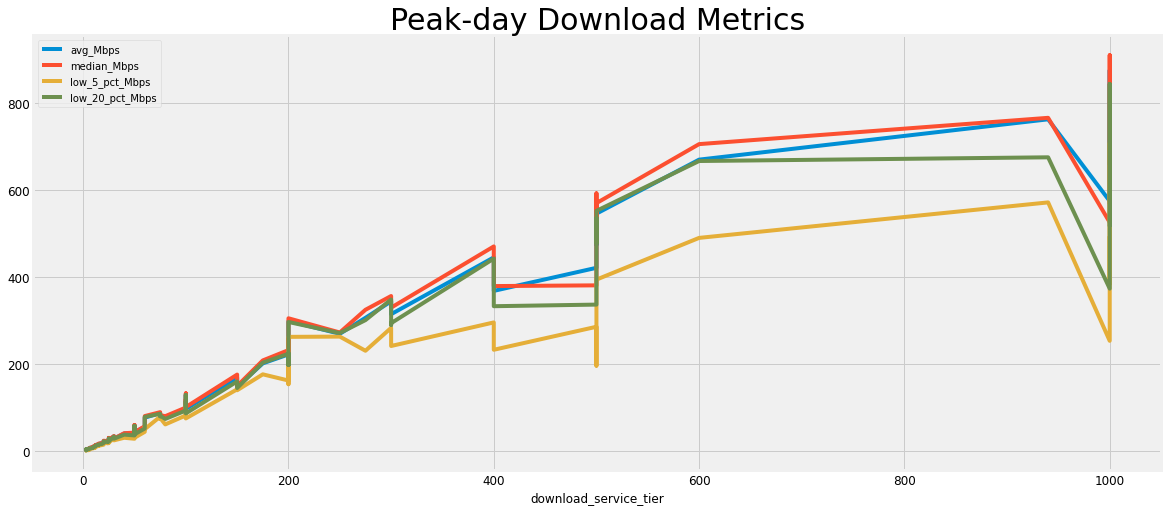

In [7]:
ax = peak_download.plot.scatter(x="download_service_tier", y = ["avg_Mbps", "median_Mbps","low_5_pct_Mbps", "low_20_pct_Mbps" ], figsize=(18, 8), fontsize = 12)
ax.set_title('Peak-day Download Metrics',fontsize= 30) 


plt.show()

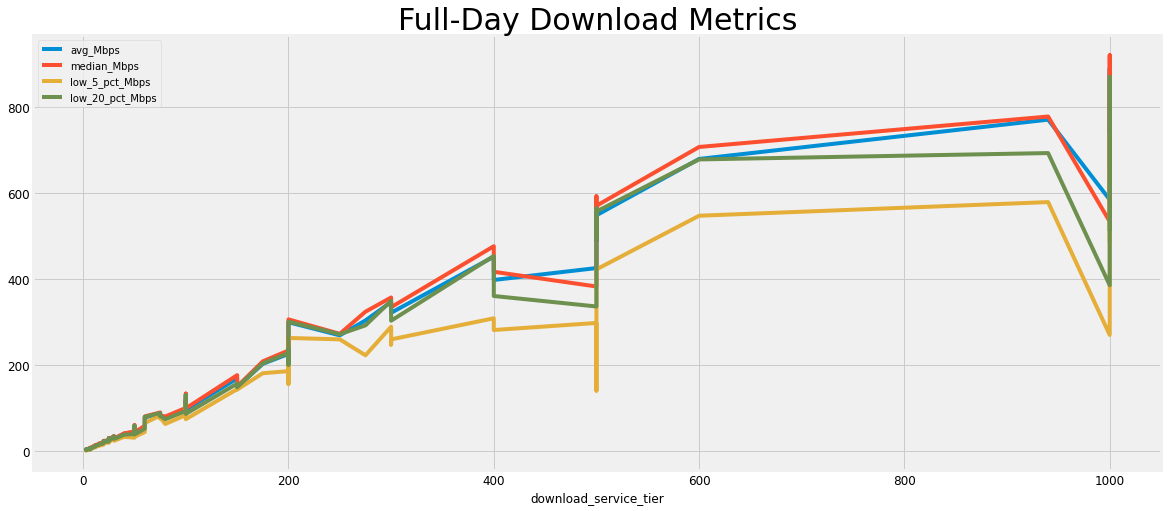

In [16]:
ax = fullDay_download.plot(x="download_service_tier", y = ["avg_Mbps", "median_Mbps","low_5_pct_Mbps", "low_20_pct_Mbps" ], figsize=(18,8), fontsize = 12)
ax.set_title('Full-Day Download Metrics',fontsize= 30) 


plt.show()

In [29]:
x = fullDay_download["download_service_tier"].tolist()
x
y = fullDay_download["median_Mbps"].tolist()
z = peak_download['median_Mbps'].tolist()
print('x', len(x))
print('y', len(y))
print('z', len(z))

print(x)
print(z)


# plt.plot(x, y)
# plt.plot(x,z)
# plt.show()

x 79
y 79
z 78
[1.5, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 6.0, 6.0, 7.0, 7.0, 8.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 15.0, 15.0, 18.0, 20.0, 20.0, 24.0, 25.0, 25.0, 25.0, 25.0, 30.0, 30.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 75.0, 75.0, 75.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 175.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 250.0, 275.0, 300.0, 300.0, 300.0, 400.0, 400.0, 500.0, 500.0, 500.0, 500.0, 600.0, 940.0, 1000.0, 1000.0, 1000.0, 1000.0]
[1.235744, 2.83232, 3.556472, 2.632312, 2.307192, 2.66584, 4.367472, 4.216632, 5.683616, 5.984448, 7.221384, 7.46344, 9.619016, 8.498616, 9.701448, 12.256608, 11.446672, 13.31912, 15.072264, 16.430744, 17.571544, 20.031648, 23.200584, 21.911664, 24.11792, 29.699632, 28.628232, 25.281928, 33.992152, 28.045912, 40.46888, 41.741904, 59.45824, 56.943496, 56.92388, 42.628344, 56.401624, 70.071056, 79.851504, 88.8774, 81.965032, 82.051584, 79.652128, 99.480784, 114.261376, 118.729664, 

<h3> Sample Download Speed Data & Graphs w/ Comcast</h3>

In [33]:
# Comcast Dataframes

# Download 
df_peak_download_comcast = peak_download[peak_download['ISP']=="Comcast"]
df_fullDay_download_comcast = fullDay_download[fullDay_download['ISP']=="Comcast"]

# Upload

df_peak_upload_comcast = peak_upload[peak_upload['ISP']=="Comcast"]
df_fullDay_upload_comcast = fullDay_upload[fullDay_upload['ISP']=="Comcast"]


In [34]:
df_peak_download_comcast

,download_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
5,3.0,Comcast,Cable,3.511462,3.556472,3.279112,3.577728,3.607728,0.262824,0.230169,10
30,15.0,Comcast,Cable,16.797835,17.828472,9.627640,17.864512,17.884024,9.386312,2.459733,1
43,25.0,Comcast,Cable,28.419018,29.699632,23.594880,29.793208,30.241992,0.197568,3.709781,57
52,35.0,Comcast,Cable,41.647737,41.646128,41.507840,41.825888,41.935408,41.442992,0.075714,2
65,70.0,Comcast,Cable,81.138179,82.616488,73.697920,83.436712,83.593912,64.365872,3.641850,4
67,75.0,Comcast,Cable,86.883362,88.877400,78.446848,89.412880,89.875416,26.249472,4.915926,42
75,100.0,Comcast,Cable,114.927412,118.729664,93.931080,119.613016,121.017336,0.227976,10.566201,59
82,105.0,Comcast,Cable,112.864438,114.152488,99.201280,119.764312,120.711112,92.254640,5.990908,3
88,175.0,Comcast,Cable,201.187753,207.945368,175.948088,208.656456,208.998904,12.501008,24.287269,40
90,200.0,Comcast,Cable,229.356936,235.659080,200.418256,238.439256,350.955728,0.129736,18.011758,66


In [35]:
df_fullDay_download_comcast

,download_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
5,3.0,Comcast,Cable,3.504590,3.557408,3.187368,3.579376,3.683936,0.262824,0.201568,10
30,15.0,Comcast,Cable,17.318270,17.827320,15.285936,17.873648,17.900024,9.386312,1.577740,1
44,25.0,Comcast,Cable,28.856753,29.721936,25.040440,29.798944,30.241992,0.197568,3.027232,57
53,35.0,Comcast,Cable,41.571313,41.645400,41.280800,41.825888,41.935408,34.682328,0.506218,2
66,70.0,Comcast,Cable,81.589116,83.115360,73.697920,83.558960,83.955520,25.588104,4.951296,4
68,75.0,Comcast,Cable,87.776968,89.163696,82.060592,89.418176,91.241448,2.980912,5.015997,42
76,100.0,Comcast,Cable,115.704404,118.959112,95.285192,119.708776,121.047848,0.052080,9.166973,61
83,105.0,Comcast,Cable,113.746587,114.757856,104.129032,119.435744,123.109936,92.056648,4.952287,3
89,175.0,Comcast,Cable,202.412976,208.127640,180.536072,208.660016,209.235528,1.975416,20.576733,41
91,200.0,Comcast,Cable,233.172231,237.742616,212.748776,238.707792,761.957264,0.016760,13.767054,67


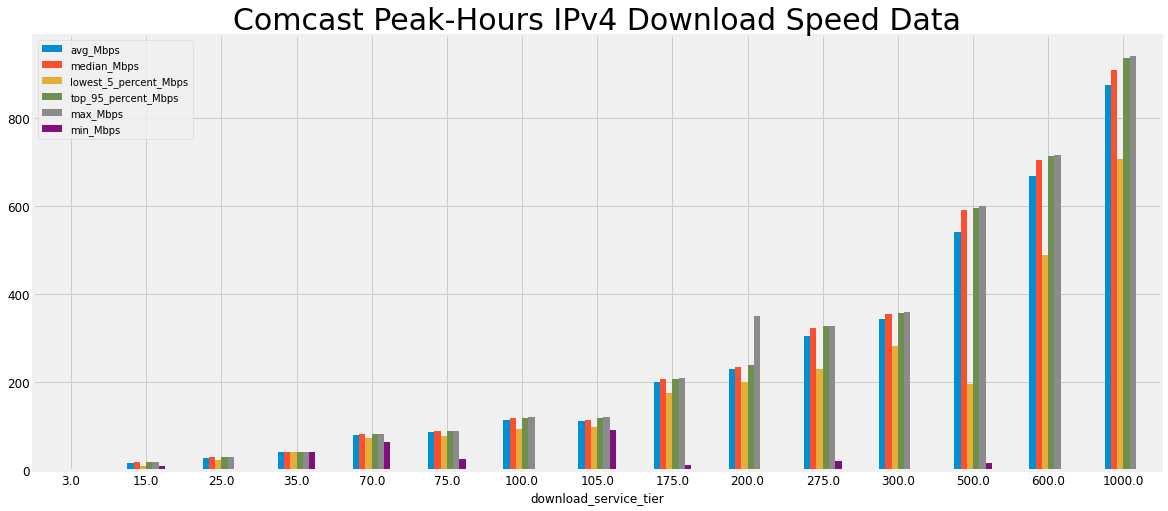

In [37]:
ax = df_peak_download_comcast.plot.bar(x="download_service_tier", 
                         y = ["avg_Mbps", "median_Mbps", "lowest_5_percent_Mbps", "top_95_percent_Mbps", 
                              "max_Mbps","min_Mbps"], rot=0, figsize=(18,8), fontsize = 12)

ax.set_title('Comcast Peak-Hours IPv4 Download Speed Data',fontsize= 30) 
plt.show()

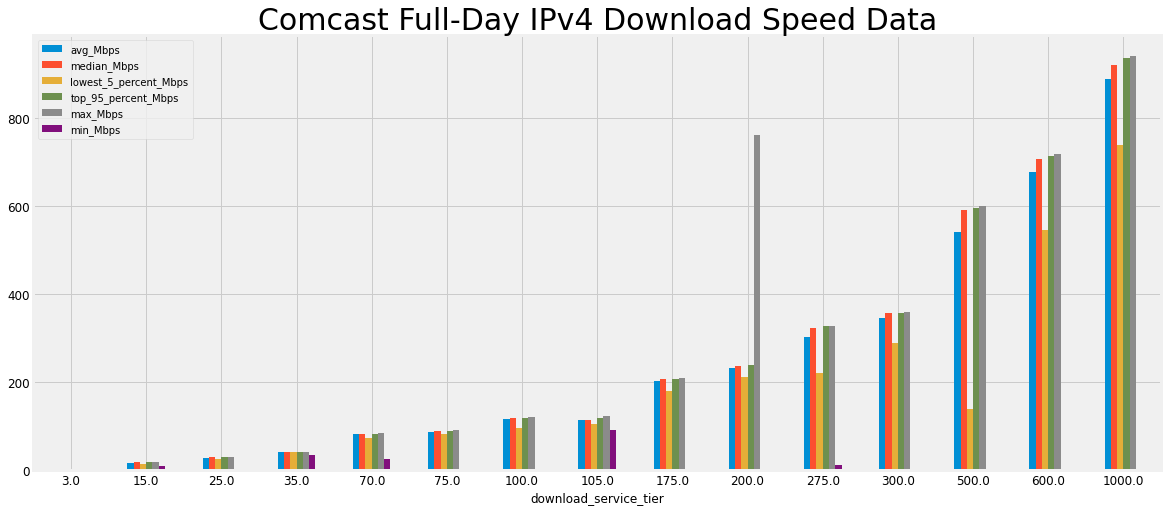

In [38]:
ax = df_fullDay_download_comcast.plot.bar(x="download_service_tier", 
                         y = ["avg_Mbps", "median_Mbps", "lowest_5_percent_Mbps", "top_95_percent_Mbps", 
                              "max_Mbps","min_Mbps"], rot=0, figsize=(18,8), fontsize = 12)

ax.set_title('Comcast Full-Day IPv4 Download Speed Data',fontsize= 30) 
plt.show()

<h3> Sample Upload Speed Data & Graphs w/ Comcast </h3>

In [39]:
df_peak_upload_comcast

,upload_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
28,2.0,Comcast,Cable,2.362218,2.369864,2.177512,2.537632,2.710552,0.847736,0.145500,22
34,3.0,Comcast,Cable,3.454053,3.489504,3.276344,3.592144,3.971400,0.487624,0.298724,46
42,5.0,Comcast,Cable,5.745813,5.830456,5.118984,5.986664,41.727792,0.997808,0.833960,186
49,10.0,Comcast,Cable,11.466564,11.630632,10.571560,11.920968,12.061880,1.297016,1.098353,91
53,15.0,Comcast,Cable,17.247182,17.407552,16.229544,17.866872,18.113776,8.254960,0.981138,36
58,20.0,Comcast,Cable,22.995827,23.248376,21.258312,23.893776,23.998096,1.420816,1.895603,12
63,30.0,Comcast,Cable,35.030449,35.597624,32.025104,35.718808,35.718808,32.025104,1.037373,1
67,35.0,Comcast,Cable,35.795255,40.395616,17.575600,41.687680,42.612864,1.663056,8.458840,51


In [40]:
df_fullDay_upload_comcast

,upload_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
28,2.0,Comcast,Cable,2.365548,2.369864,2.197640,2.535240,2.710552,0.801888,0.120923,22
34,3.0,Comcast,Cable,3.465642,3.497288,3.280544,3.602600,4.019504,0.487624,0.276685,46
42,5.0,Comcast,Cable,5.797556,5.838152,5.397760,5.991184,938.522296,0.111024,4.461997,190
49,10.0,Comcast,Cable,11.442383,11.633088,10.332664,11.926256,12.085144,0.150984,1.156792,91
53,15.0,Comcast,Cable,17.135553,17.394768,15.547128,17.868048,18.192976,0.034672,1.311346,37
58,20.0,Comcast,Cable,23.081533,23.237232,22.541664,23.880448,24.032448,0.589392,1.713504,12
63,30.0,Comcast,Cable,35.524180,35.668984,34.351816,35.826048,35.922568,32.025104,0.550587,1
67,35.0,Comcast,Cable,36.571505,40.501456,17.732688,41.710096,42.866544,1.663056,8.109862,51


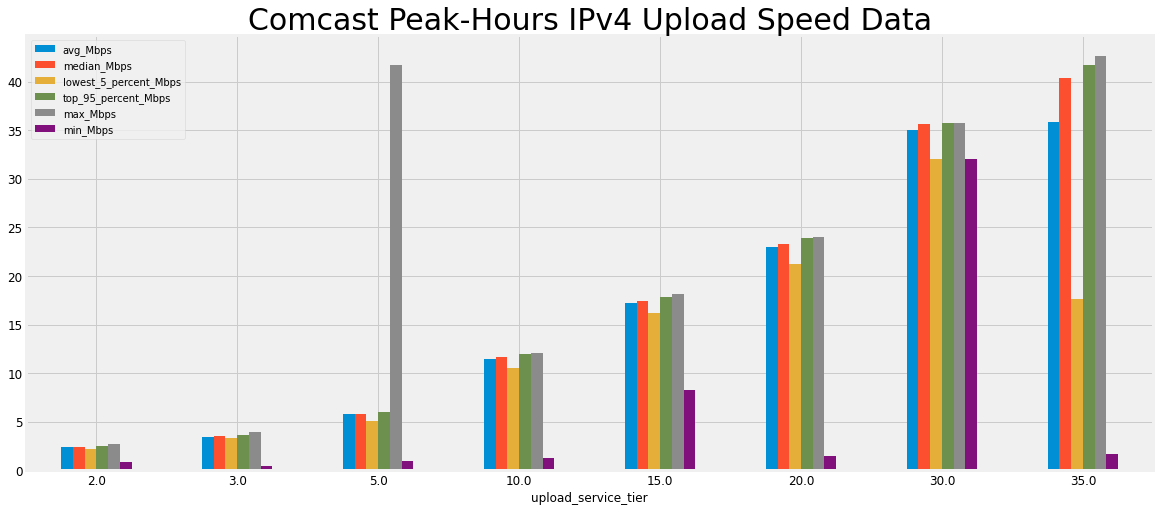

In [41]:
ax = df_peak_upload_comcast.plot.bar(x="upload_service_tier", 
                         y = ["avg_Mbps", "median_Mbps", "lowest_5_percent_Mbps", "top_95_percent_Mbps", 
                              "max_Mbps","min_Mbps"], rot=0, figsize=(18,8), fontsize = 12)

ax.set_title('Comcast Peak-Hours IPv4 Upload Speed Data',fontsize= 30) 
plt.show()

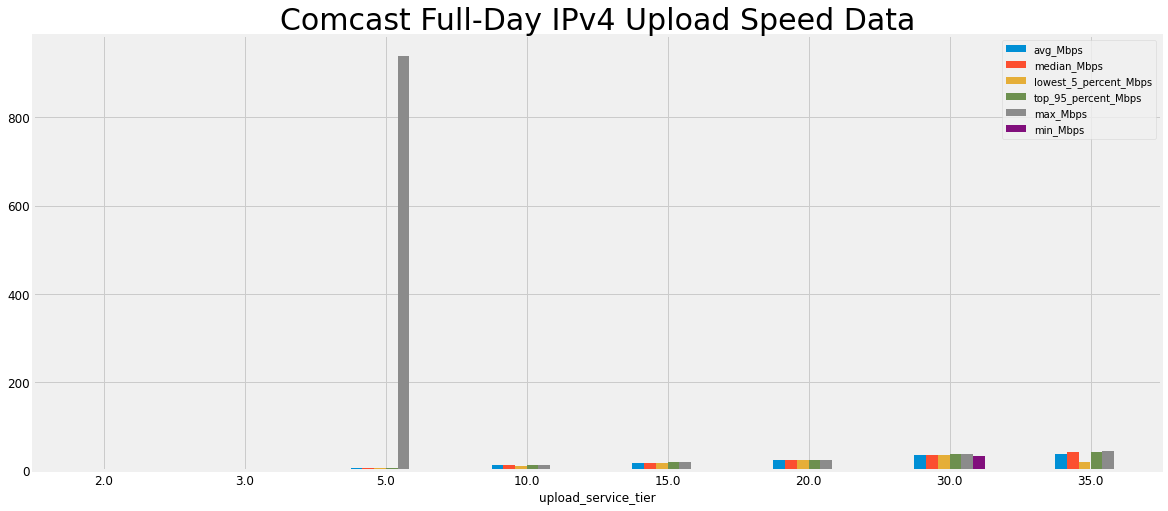

In [42]:
ax = df_fullDay_upload_comcast.plot.bar(x="upload_service_tier", 
                         y = ["avg_Mbps", "median_Mbps", "lowest_5_percent_Mbps", "top_95_percent_Mbps", 
                              "max_Mbps","min_Mbps"], rot=0, figsize=(18,8), fontsize = 12)

ax.set_title('Comcast Full-Day IPv4 Upload Speed Data',fontsize= 30) 
plt.show()

<h3>BigQuery SQL Speed Queries </h3>
<p>IPv4 with single TCP connection</p>

In [44]:
# ***DOWNLOAD***


# between 19:00 and 23:00...inclusive?
s_peak_download_sql = """
SELECT 
    mt.Download as download_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(http.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(http.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(http.bytes_sec/125000, 100)[OFFSET(5)] as lowest_5_percent_Mbps,
    APPROX_QUANTILES(http.bytes_sec/125000, 100)[OFFSET(95)] as top_95_percent_Mbps,
    MAX(http.bytes_sec/125000) as max_Mbps, 
    MIN(http.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(http.bytes_sec/125000) as STD,
    COUNT(DISTINCT http.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httpget` as http
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON http.unit_id=mt.Unit_ID
WHERE (EXTRACT(HOUR FROM http.dtime) between 19 AND 23)
GROUP BY download_service_tier, ISP, tech
ORDER BY download_service_tier, ISP
"""
# ORDER BY STD DESC

s_fullDay_download_sql = """
SELECT 
    mt.Download as download_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(http.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(http.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(http.bytes_sec/125000, 100)[OFFSET(5)] as lowest_5_percent_Mbps,
    APPROX_QUANTILES(http.bytes_sec/125000, 100)[OFFSET(95)] as top_95_percent_Mbps,
    MAX(http.bytes_sec/125000) as max_Mbps, 
    MIN(http.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(http.bytes_sec/125000) as STD,
    COUNT(DISTINCT http.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httpget` as http
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON http.unit_id=mt.Unit_ID
GROUP BY download_service_tier, ISP, tech
ORDER BY download_service_tier, ISP
"""
# ORDER BY STD DESC
# WHERE (EXTRACT(HOUR FROM http.dtime) NOT between 19 AND 23)



# ***UPLOAD***

# between 19:00 and 23:00...inclusive?
s_peak_upload_sql = """
SELECT
    mt.Upload as upload_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(httpp.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(httpp.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(httpp.bytes_sec/125000, 100)[OFFSET(5)] as lowest_5_percent_Mbps,
    APPROX_QUANTILES(httpp.bytes_sec/125000, 100)[OFFSET(95)] as top_95_percent_Mbps,
    MAX(httpp.bytes_sec/125000) as max_Mbps, 
    MIN(httpp.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(httpp.bytes_sec/125000) as STD,
    COUNT(DISTINCT httpp.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httppost` as httpp
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpp.unit_id=mt.Unit_ID
WHERE (EXTRACT(HOUR FROM httpp.dtime) between 19 AND 23)
GROUP BY upload_service_tier, ISP, tech
ORDER BY upload_service_tier, ISP
"""

s_fullDay_upload_sql = """
SELECT
    mt.Upload as upload_service_tier,
    mt.ISP as ISP,
    mt.Technology as tech,
    avg(httpp.bytes_sec/125000) as avg_Mbps,
    APPROX_QUANTILES(httpp.bytes_sec/125000, 100)[OFFSET(50)] as median_Mbps,
    APPROX_QUANTILES(httpp.bytes_sec/125000, 100)[OFFSET(5)] as lowest_5_percent_Mbps,
    APPROX_QUANTILES(httpp.bytes_sec/125000, 100)[OFFSET(95)] as top_95_percent_Mbps,
    MAX(httpp.bytes_sec/125000) as max_Mbps, 
    MIN(httpp.bytes_sec/125000) as min_Mbps,
    STDDEV_SAMP(httpp.bytes_sec/125000) as STD,
    COUNT(DISTINCT httpp.unit_id) as total_boxes
FROM `broadband-data.mba_data.curr_httppost` as httpp
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpp.unit_id=mt.Unit_ID
GROUP BY upload_service_tier, ISP, tech
ORDER BY upload_service_tier, ISP
"""
# WHERE (EXTRACT(HOUR FROM httpp.dtime) NOT between 19 AND 23)


# Creating main dataframes
peak_download_s = client.query(s_peak_download_sql).to_dataframe()
fullDay_download_s = client.query(s_fullDay_download_sql).to_dataframe()
peak_upload_s = client.query(s_peak_upload_sql).to_dataframe()
fullDay_upload_s = client.query(s_fullDay_upload_sql).to_dataframe()

In [45]:
peak_download_s

,download_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,0.768,CenturyLink,DSL,1.033113,1.351912,0.147312,1.422448,1.429360,0.001120,0.497758,1
1,1.500,CenturyLink,DSL,1.130012,1.235936,0.208936,1.470792,1.543296,0.021984,0.388506,27
2,3.000,Windstream,DSL,2.465978,2.592104,0.425688,3.935912,4.288136,0.031072,1.112697,6
3,4.000,Windstream,DSL,3.850155,4.350080,1.578728,4.391744,4.587568,0.006904,0.950490,14
4,6.000,Frontier,DSL,2.592854,1.672192,0.090920,6.435560,6.633512,0.045808,2.253350,1
5,6.000,Windstream,DSL,6.066483,6.025848,4.990912,6.856776,6.918216,0.474152,0.758038,6
6,10.000,CenturyLink,DSL,9.034672,9.616464,5.631120,11.685664,12.058632,0.444680,1.793495,26
7,10.000,Windstream,DSL,6.954690,8.251608,1.145096,10.686808,14.702360,0.237072,2.895802,7
8,12.000,CenturyLink,DSL,11.984832,12.845416,2.890424,16.499672,16.900040,0.126592,4.077319,28
9,12.000,Frontier,DSL,11.588467,11.451056,7.990808,15.797312,15.938272,0.700056,2.621004,3


In [46]:
fullDay_download_s

,download_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,0.768,CenturyLink,DSL,0.980730,1.297008,0.147312,1.422448,1.442016,0.001120,0.500737,1
1,1.500,CenturyLink,DSL,1.186842,1.349352,0.306128,1.470864,1.549048,0.005584,0.359054,29
2,3.000,Windstream,DSL,2.696298,2.959688,0.548584,4.271384,4.380872,0.030168,1.089568,7
3,4.000,Windstream,DSL,3.980261,4.366336,1.894904,4.402096,4.632264,0.006904,0.844705,16
4,6.000,Frontier,DSL,3.137181,2.865616,0.105024,6.489192,6.633512,0.045808,2.287985,1
5,6.000,Windstream,DSL,6.007870,5.980976,5.390912,6.845600,6.921576,0.474152,0.664392,7
6,10.000,CenturyLink,DSL,9.059975,9.643384,5.610408,10.276792,12.058632,0.351800,1.714096,29
7,10.000,Windstream,DSL,8.310705,8.281504,1.993240,13.572768,14.702360,0.237072,2.931290,9
8,12.000,CenturyLink,DSL,12.211631,12.804088,3.489384,16.491872,16.900040,0.067040,3.725706,31
9,12.000,Frontier,DSL,12.266430,11.467792,7.868880,15.866320,15.975344,0.700056,2.714528,3


In [47]:
peak_upload_s

,upload_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,0.256,CenturyLink,DSL,0.196146,0.201648,0.110720,0.316504,0.441336,0.042864,0.058117,8
1,0.512,CenturyLink,DSL,0.229079,0.210824,0.121904,0.474200,0.733816,0.007832,0.104110,19
2,0.640,CenturyLink,DSL,0.676341,0.693496,0.574856,0.734968,0.740728,0.475312,0.058805,1
3,0.750,CenturyLink,DSL,0.636428,0.683128,0.215848,0.786232,0.835384,0.054448,0.148359,15
4,0.768,CenturyLink,DSL,0.824758,0.826488,0.754112,0.948728,0.955672,0.679976,0.049854,1
5,0.768,Windstream,DSL,0.581078,0.603640,0.248280,0.754912,0.931960,0.102528,0.136794,19
6,0.896,CenturyLink,DSL,0.711690,0.713528,0.503280,0.899184,0.959144,0.025720,0.111536,32
7,1.000,CenturyLink,DSL,0.792526,0.727464,0.594424,1.072504,1.132408,0.010424,0.159276,11
8,1.000,Frontier,DSL,0.934612,0.948400,0.690048,1.514296,1.592056,0.264960,0.247660,6
9,1.000,Windstream,DSL,0.902774,0.884648,0.760512,1.183264,1.391600,0.033552,0.129497,25


In [48]:
fullDay_upload_s

,upload_service_tier,ISP,tech,avg_Mbps,median_Mbps,lowest_5_percent_Mbps,top_95_percent_Mbps,max_Mbps,min_Mbps,STD,total_boxes
0,0.256,CenturyLink,DSL,0.195637,0.206192,0.106248,0.232624,0.441336,0.022368,0.054745,9
1,0.512,CenturyLink,DSL,0.228732,0.211376,0.107728,0.484264,0.734968,0.005792,0.109974,19
2,0.640,CenturyLink,DSL,0.688648,0.704584,0.579328,0.732664,0.740728,0.475312,0.048014,1
3,0.750,CenturyLink,DSL,0.623808,0.680832,0.196840,0.783072,0.843304,0.033408,0.163493,18
4,0.768,CenturyLink,DSL,0.803498,0.824256,0.593096,0.948728,0.957992,0.308128,0.099956,1
5,0.768,Windstream,DSL,0.591823,0.612872,0.252752,0.761624,0.934264,0.069120,0.130913,22
6,0.896,CenturyLink,DSL,0.718205,0.716896,0.506632,0.899704,0.960416,0.025720,0.105477,35
7,1.000,CenturyLink,DSL,0.767916,0.723600,0.611632,1.059112,1.132408,0.010424,0.137732,12
8,1.000,Frontier,DSL,0.980385,0.952872,0.691168,1.544504,1.594360,0.264960,0.279494,6
9,1.000,Windstream,DSL,0.910432,0.892480,0.763864,1.161208,1.403120,0.033552,0.127519,30


<h2> 80/80 test

In [42]:
download_speeds = [10,20,40,14,13,22,10,50,100,200, 12, 5, 4, 13, 10, 13, 100, 200, 300, 400, 100, 300, 400, 5000, 100,5000]
download_speeds.sort()
twenty_per = len(download_speeds) * .2
twenty_per = round(twenty_per)
print("length", len(download_speeds))
print(twenty_per)

ten_per = round(len(download_speeds) * .1)
print('ten_per_val', download_speeds[ten_per])



i = 0
y = []
while i < twenty_per: 
    y.append(download_speeds[i])
    i=i+1

print(y)

new_twenty_per = round(len(y)*.2)
result = y[new_twenty_per]

print('Result:', result)

length 26
5
ten_per_val 10
[4, 5, 10, 10, 10]
Result: 5


In [39]:
length = 2
y = round(length * .2)
print(y)

0


In [41]:
5.0 * .2

1.0

In [75]:
# length here refers to an ordered list of speeds experienced by unique whiteboxes at specific download tier
length = 100



four_pct = length * .04
five_pct = length * .05
ten_pct = length * .1
twenty_pct = length * .2




eighty_eighty = (length * .2) * .2
eighty_eighty_v2 = (length *.2) * .8



print("four_per", four_per)
print("five_per", five_per)
print("ten_per", ten_per)
print('twenty_per', twenty_per)
print('80/80', eighty_eighty)
print('eighty_eighty_v2', eighty_eighty_v2)



four_per 4.0
five_per 5.0
ten_per 10.0
twenty_per 20.0
80/80 4.0
eighty_eighty_v2 16.0


0.04000000000000001
